# Prédiction de l'obtention d'un permis avec un réseau de neurones artificiel

### 1. Nettoyage du dataset

In [111]:
# Importation des librairies

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importtion du dataset

df_permit = pd.read_csv('dataset/dataset_issued.csv')

# Suppression des catégories inutiles

df_permit = df_permit.drop(['Permit Number'],axis=1)
df_permit = df_permit.drop(['Block'],axis=1)
df_permit = df_permit.drop(['Lot'],axis=1)
df_permit = df_permit.drop(['Street Number'],axis=1)
df_permit = df_permit.drop(['Street Number Suffix'],axis=1)
df_permit = df_permit.drop(['Unit'],axis=1)
df_permit = df_permit.drop(['Unit Suffix'],axis=1)
df_permit = df_permit.drop(['Description'],axis=1)
df_permit = df_permit.drop(['Permit Expiration Date'],axis=1)
df_permit = df_permit.drop(['Estimated Cost'],axis=1)
df_permit = df_permit.drop(['Existing Use'],axis=1)
df_permit = df_permit.drop(['Existing Units'],axis=1)
df_permit = df_permit.drop(['Plansets'],axis=1)
df_permit = df_permit.drop(['Location'],axis=1)
df_permit = df_permit.drop(['Record ID'],axis=1)
df_permit = df_permit.drop(['Filed Date'],axis=1)

#Remplacement des données manquantes avec des zéros (voir paramètre du fillna)

df_permit['Number of Existing Stories'] = df_permit['Number of Existing Stories'].fillna(0)
df_permit['Number of Proposed Stories'] = df_permit['Number of Proposed Stories'].fillna(0)
df_permit['Structural Notification'] = df_permit['Structural Notification'].fillna(0)
df_permit['Voluntary Soft-Story Retrofit'] = df_permit['Voluntary Soft-Story Retrofit'].fillna(0)
df_permit['Fire Only Permit'] = df_permit['Fire Only Permit'].fillna(0)
df_permit['TIDF Compliance'] = df_permit['TIDF Compliance'].fillna(0)
df_permit['Site Permit'] = df_permit['Site Permit'].fillna(0)
df_permit['Street Suffix'] = df_permit['Street Suffix'].fillna(0)
df_permit['Existing Construction Type'] = df_permit['Existing Construction Type'].fillna(0)
df_permit['Proposed Construction Type'] = df_permit['Proposed Construction Type'].fillna(0)
df_permit['Existing Construction Type Description'] = df_permit['Existing Construction Type Description'].fillna(0)
df_permit['Proposed Construction Type Description'] = df_permit['Proposed Construction Type Description'].fillna(0)
df_permit['Proposed Use'] = df_permit['Proposed Use'].fillna(0)

#Remplacement des données manquantes avec la médiane (voir paramètre du fillna)

df_permit['Revised Cost'] = df_permit['Revised Cost'].fillna(np.nanmedian(df_permit['Revised Cost']))
df_permit['Proposed Units'] = df_permit['Proposed Units'].fillna(np.nanmedian(df_permit['Proposed Units']))

#Suppression des données manquantes

# df_permit = df_permit.dropna(subset=['First Construction Document Date'])
df_permit = df_permit.dropna(subset=['Neighborhoods - Analysis Boundaries'])
df_permit = df_permit.dropna(subset=['Zipcode'])
# df_permit = df_permit.dropna(subset=['Issued Date'])

df_permit['Site Permit'].value_counts()

1    182295
0     14879
Name: Site Permit, dtype: int64

In [112]:
# Modification des colonnes 'date' : 
# - Création permit date devient 0 
# - Les autres dates sont remplacées par le nombre de jour écoulé depuis la création du permis

df_date = df_permit[['Permit Creation Date','Current Status Date','Issued Date','Completed Date']]
df_date['Permit Creation Date'] = pd.to_datetime(df_date['Permit Creation Date'])
df_date['Current Status Date'] = pd.to_datetime(df_date['Current Status Date'])
df_date['Issued Date'] = pd.to_datetime(df_date['Issued Date'])
df_date['Completed Date'] = df_date['Completed Date'].fillna(np.NaN)
df_date['Completed Date'] = pd.to_datetime(df_date['Completed Date'])

df_date2=df_date
df_date2['Issued Date'] = (df_date['Issued Date'] - df_date['Permit Creation Date']).dt.days
df_date2['Current Status Date'] = (df_date2['Current Status Date'] - df_date2['Permit Creation Date']).dt.days
df_date2['Completed Date'] = (df_date2['Completed Date'] - df_date2['Permit Creation Date']).dt.days

df_date2.head(50)

Permit Creation Date  Current Status Date  Issued Date  Completed Date
0            2015-05-06                  960        187.0             NaN
1            2016-04-19                  471        471.0             NaN
2            2016-05-27                  487          NaN             NaN
3            2016-11-07                  259        253.0           259.0
4            2016-11-28                  368        368.0             NaN
5            2017-06-14                   22         22.0             NaN
6            2017-06-30                   12          0.0            12.0
7            2017-06-30                    0          0.0             NaN
8            2017-07-05                    0          0.0             NaN
9            2017-07-06                    0          0.0             NaN
10           2017-07-06                    0          0.0             NaN
11           2017-07-07                    0          0.0             NaN
12           2017-07-10                    0          0.0             NaN
13           2017-07-25                    0          NaN             NaN
14           2017-07-26                    0          0.0             NaN
15           2017-07-27                    0          0.0             NaN
16           2017-07-27                    0          0.0             NaN
17           2017-07-27                    0          0.0             NaN
18           2017-07-28                    0          NaN             NaN
19           2017-07-28                    0          0.0             NaN
20           2017-07-31                    0          0.0             NaN
21           2017-08-01                    0          NaN             NaN
22           2017-08-01                    0          NaN             NaN
23           2017-08-07                    0          0.0             NaN
24           2017-08-08                    0          0.0             NaN
25           2017-08-16                    0          0.0             NaN
26           2017-08-18                    0          0.0             NaN
27           2017-08-21                    0          0.0             NaN
28           2017-08-21                    0          0.0             NaN
29           2017-08-22                    0          0.0             NaN
30           2017-08-23                    0          0.0             NaN
31           2017-08-23                    0          0.0             NaN
32           2017-08-23                    0          0.0             NaN
33           2017-08-24                  112          NaN             NaN
34           2017-08-25                    0          0.0             NaN
35           2017-08-25                    0          0.0             NaN
36           2017-08-28                    0          0.0             NaN
37           2017-08-29                    0          0.0             NaN
38           2017-08-29                    0          0.0             NaN
39           2017-09-07                    0          0.0             NaN
40           2017-09-08                    0          0.0             NaN
41           2017-09-15                    0          0.0             NaN
42           2017-09-15                    0          NaN             NaN
43           2017-09-19                    0          0.0             NaN
44           2017-09-21                    0          0.0             NaN
45           2017-09-27                    0          0.0             NaN
46           2017-09-28                    0          0.0             NaN
47           2017-10-04                    0          0.0             NaN
48           2017-10-11                   20          0.0            20.0
49           2017-10-11                    0          0.0             NaN

In [113]:
#On rajoute nos données modifiées dans le dataset initial 

a = np.array(df_date2['Completed Date'].values.tolist())
df_date2['Completed Date'] = np.where(a > 5000, 9999, a).tolist()

df_permit['Current Status Date'] = df_date2['Current Status Date']
df_permit['Issued Date'] = df_date2['Issued Date']
df_permit['Completed Date'] = df_date2['Completed Date']

df_permit.head()

Unnamed: 0  Permit Type            Permit Type Definition  \
0           0            4                      sign - erect   
1           1            4                      sign - erect   
2           2            3  additions alterations or repairs   
3           3            8            otc alterations permit   
4           4            6                       demolitions   

  Permit Creation Date Street Name Street Suffix Current Status  \
0           05/06/2015       Ellis            St        expired   
1           04/19/2016       Geary            St         issued   
2           05/27/2016     Pacific            Av      withdrawn   
3           11/07/2016     Pacific            Av       complete   
4           11/28/2016      Market            St         issued   

   Current Status Date  Issued Date  Completed Date   ...    Proposed Units  \
0                  960        187.0             NaN   ...               2.0   
1                  471        471.0             NaN   ...               2.0   
2                  487          NaN             NaN   ...              39.0   
3                  259        253.0           259.0   ...               1.0   
4                  368        368.0             NaN   ...               2.0   

  TIDF Compliance  Existing Construction Type  \
0               0                         3.0   
1               0                         3.0   
2               0                         1.0   
3               0                         5.0   
4               0                         3.0   

   Existing Construction Type Description Proposed Construction Type  \
0                           constr type 3                        0.0   
1                           constr type 3                        0.0   
2                           constr type 1                        1.0   
3                          wood frame (5)                        5.0   
4                           constr type 3                        0.0   

  Proposed Construction Type Description  Site Permit Supervisor District  \
0                                      0            1                 3.0   
1                                      0            1                 3.0   
2                          constr type 1            0                 3.0   
3                         wood frame (5)            1                 3.0   
4                                      0            1                 6.0   

   Neighborhoods - Analysis Boundaries  Zipcode  
0                           Tenderloin  94102.0  
1                           Tenderloin  94102.0  
2                         Russian Hill  94109.0  
3                             Nob Hill  94109.0  
4                           Tenderloin  94102.0  

[5 rows x 28 columns]

In [114]:
#One hot encoder : on convertit les données de type string en integer pour les passer dans notre réseau de neurones

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_X_1 = LabelEncoder()

df_permit_encoded = df_permit
df_permit_encoded['Permit Type Definition'] =labelencoder_X_1.fit_transform(df_permit_encoded['Permit Type Definition'])
df_permit_encoded['Street Name'] =labelencoder_X_1.fit_transform(df_permit_encoded['Street Name'])
df_permit_encoded['Street Suffix'] =labelencoder_X_1.fit_transform(df_permit_encoded['Street Suffix'].astype(str))
df_permit_encoded['Current Status'] =labelencoder_X_1.fit_transform(df_permit_encoded['Current Status'].astype(str))
df_permit_encoded['Existing Construction Type Description'] =labelencoder_X_1.fit_transform(df_permit_encoded['Existing Construction Type Description'].astype(str))
df_permit_encoded['Structural Notification'] =labelencoder_X_1.fit_transform(df_permit_encoded['Structural Notification'].astype(str))
df_permit_encoded['TIDF Compliance'] =labelencoder_X_1.fit_transform(df_permit_encoded['TIDF Compliance'].astype(str))
df_permit_encoded['Site Permit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Site Permit'].astype(str))
df_permit_encoded['Neighborhoods - Analysis Boundaries'] =labelencoder_X_1.fit_transform(df_permit_encoded['Neighborhoods - Analysis Boundaries'].astype(str))
df_permit_encoded['Proposed Construction Type Description'] =labelencoder_X_1.fit_transform(df_permit_encoded['Proposed Construction Type Description'].astype(str))
df_permit_encoded['Number of Proposed Stories'] =labelencoder_X_1.fit_transform(df_permit_encoded['Number of Proposed Stories'].astype(str))
df_permit_encoded['Voluntary Soft-Story Retrofit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Voluntary Soft-Story Retrofit'].astype(str))
df_permit_encoded['Fire Only Permit'] =labelencoder_X_1.fit_transform(df_permit_encoded['Fire Only Permit'].astype(str))
df_permit_encoded['Revised Cost'] =labelencoder_X_1.fit_transform(df_permit_encoded['Revised Cost'].astype(str))
df_permit_encoded['Proposed Use'] =labelencoder_X_1.fit_transform(df_permit_encoded['Proposed Use'].astype(str))
df_permit_encoded.head()

Unnamed: 0  Permit Type  Permit Type Definition Permit Creation Date  \
0           0            4                       6           05/06/2015   
1           1            4                       6           04/19/2016   
2           2            3                       0           05/27/2016   
3           3            8                       5           11/07/2016   
4           4            6                       1           11/28/2016   

   Street Name  Street Suffix  Current Status  Current Status Date  \
0          529             17               5                  960   
1          640             17               8                  471   
2         1187              2              13                  487   
3         1187              2               3                  259   
4         1003             17               8                  368   

   Issued Date  Completed Date   ...    Proposed Units  TIDF Compliance  \
0        187.0             NaN   ...               2.0                0   
1        471.0             NaN   ...               2.0                0   
2          NaN             NaN   ...              39.0                0   
3        253.0           259.0   ...               1.0                0   
4        368.0             NaN   ...               2.0                0   

   Existing Construction Type  Existing Construction Type Description  \
0                         3.0                                       3   
1                         3.0                                       3   
2                         1.0                                       1   
3                         5.0                                       5   
4                         3.0                                       3   

   Proposed Construction Type  Proposed Construction Type Description  \
0                         0.0                                       0   
1                         0.0                                       0   
2                         1.0                                       1   
3                         5.0                                       5   
4                         0.0                                       0   

   Site Permit  Supervisor District  Neighborhoods - Analysis Boundaries  \
0            1                  3.0                                   35   
1            1                  3.0                                   35   
2            0                  3.0                                   31   
3            1                  3.0                                   20   
4            1                  6.0                                   35   

   Zipcode  
0  94102.0  
1  94102.0  
2  94109.0  
3  94109.0  
4  94102.0  

[5 rows x 28 columns]

In [115]:
#Probleme : la majorité des données ne mènent pas à l'obtention d'un permis. Dans notre cas, il faut avoir 
# 50% de permis validés et 50% de permis refusés pour optimiser les perf de notre réseau de neurones

df_permit_validated = df_permit_encoded.loc[df_permit_encoded['Site Permit'] == 1]
df_permit_refused = df_permit_encoded.loc[df_permit_encoded['Site Permit'] == 0]
print("=1", len(df_permit_validated))
print("=0", len(df_permit_refused))


df_permit_encoded_equal = df_permit_refused.append(df_permit_validated.iloc[:len(df_permit_refused),])
print("final", len(df_permit_encoded_equal))


df_permit_encoded_equal = df_permit_encoded_equal.drop(['Permit Creation Date'],axis=1)
df_permit_encoded_equal = df_permit_encoded_equal.drop(['First Construction Document Date'],axis=1)
df_permit_encoded_equal = df_permit_encoded_equal.drop(['Completed Date'],axis=1)

issuedate = df_permit_encoded_equal['Issued Date']

df_permit_encoded_equal.head()
df_permit_encoded_equal.sample(frac=1)


from sklearn.utils import shuffle


df_permit_encoded_equal = shuffle(df_permit_encoded_equal)


=1 182295
=0 14879
final 29758


# Prediction de site permit

In [117]:
#On normalise les données pour diminuer le temps de traitement de notre algo et augmenter ses perf


from sklearn import preprocessing

X = df_permit_encoded_equal.drop(["Unnamed: 0", "Issued Date", "Current Status Date","Site Permit"],axis=1)
Y = df_permit_encoded_equal['Site Permit']

min_max_scalerX = preprocessing.MinMaxScaler()
X_scaled = min_max_scalerX.fit_transform(X)

min_max_scalerY = preprocessing.MinMaxScaler()
Y_scaled = min_max_scalerY.fit_transform(np.array(Y).reshape(-1, 1))



In [118]:
# Création de l'algo 

from sklearn.model_selection import train_test_split

#On sépare le dataset en 4 dataset pour l'entrainer et le tester

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

Train on 23806 samples, validate on 5952 samples
Epoch 1/1000
23806/23806 [==============================] - 5s 220us/step - loss: 0.6970 - acc: 0.5405 - val_loss: 0.6674 - val_acc: 0.6702
Epoch 2/1000
23806/23806 [==============================] - 2s 101us/step - loss: 0.6694 - acc: 0.5931 - val_loss: 0.6315 - val_acc: 0.6937
Epoch 3/1000
23806/23806 [==============================] - 2s 97us/step - loss: 0.6383 - acc: 0.6383 - val_loss: 0.5933 - val_acc: 0.7033
Epoch 4/1000
23806/23806 [==============================] - 2s 82us/step - loss: 0.6118 - acc: 0.6678 - val_loss: 0.5645 - val_acc: 0.7238
Epoch 5/1000
23806/23806 [==============================] - 2s 82us/step - loss: 0.5965 - acc: 0.6849 - val_loss: 0.5471 - val_acc: 0.7317
Epoch 6/1000
23806/23806 [==============================] - 2s 82us/step - loss: 0.5803 - acc: 0.7014 - val_loss: 0.5303 - val_acc: 0.7678
Epoch 7/1000
23806/23806 [==============================] - 2s 82us/step - loss: 0.5625 - acc: 0.7163 - val_loss: 0

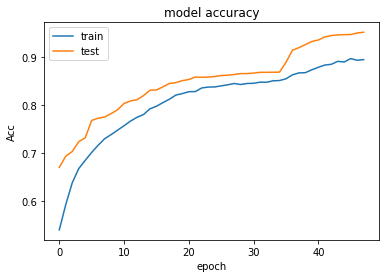

scores_train =  95.42552297790141 %
scores_test =  95.09408602150538 %


In [163]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

# Initialising the ANN : création des différentes couches

classifier = Sequential()

classifier.add(Dense(units=15, activation='relu', input_dim=21))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


callbacks = [EarlyStopping(monitor='loss', patience=2)]


history = classifier.fit(X_train, y_train,
                             batch_size=20,
                             epochs=1000,
                             callbacks=callbacks,
                             validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('Acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores_train = classifier.evaluate(X_train, y_train, verbose=0)
scores_test = classifier.evaluate(X_test, y_test, verbose=0)

print("scores_train = ", scores_train[1] * 100, '%')
print("scores_test = ", scores_test[1] * 100, '%')

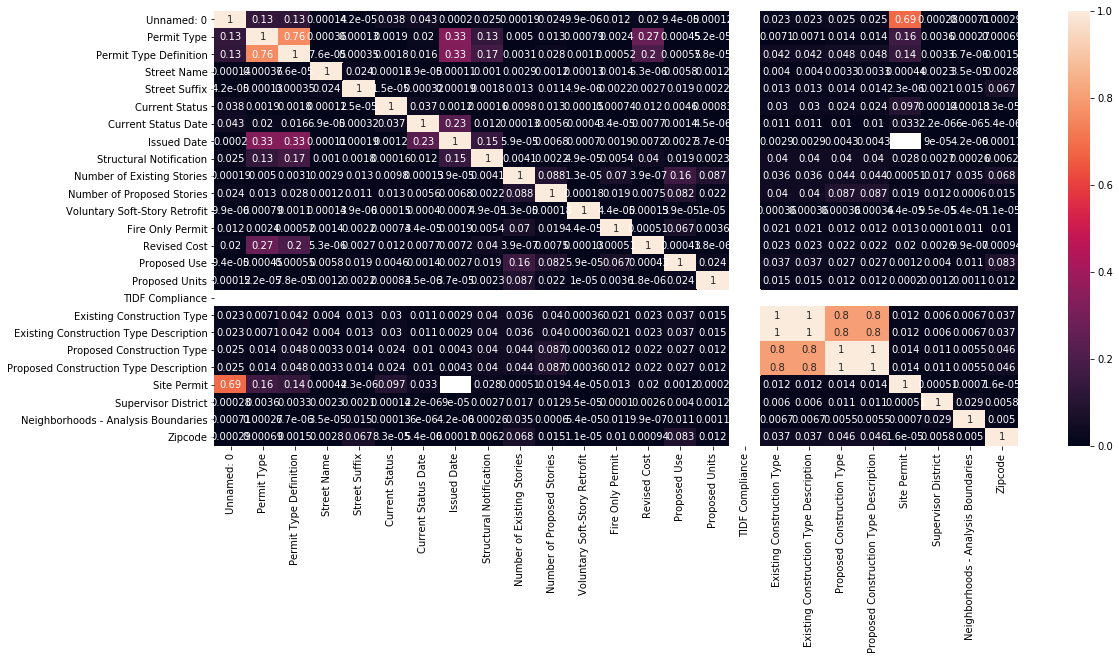

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_permit_encoded_equal.corr()

fig,ax=plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix**2,annot=True)

# Predict the permit issue times

In [136]:
#On normalise les données pour diminuer le temps de traitement de notre algo et augmenter ses perf

from sklearn import preprocessing

df_permit_encoded_equalwithoutnan = df_permit_encoded_equal.dropna(subset=['Issued Date'])


X2 = df_permit_encoded_equalwithoutnan.drop(['Unnamed: 0','Issued Date'],axis=1)
Y2 = df_permit_encoded_equalwithoutnan['Issued Date']


min_max_scalerX2 = preprocessing.MinMaxScaler()
X_scaled2 = min_max_scalerX2.fit_transform(X2)

min_max_scalerY2 = preprocessing.MinMaxScaler()
Y_scaled2 = min_max_scalerY2.fit_transform(np.array(Y2).reshape(-1, 1))

X2.head()

Permit Type  Permit Type Definition  Street Name  Street Suffix  \
8386            8                       5          405             17   
1014            8                       5         1483             17   
5897            8                       5         1231             17   
1396            8                       5           27             17   
2836            8                       5          364             19   

      Current Status  Current Status Date  Structural Notification  \
8386               3                   77                        0   
1014               3                   87                        0   
5897               3                  148                        0   
1396               3                  189                        0   
2836               3                   48                        0   

      Number of Existing Stories  Number of Proposed Stories  \
8386                         2.0                          13   
1014                         2.0                          13   
5897                         2.0                          13   
1396                         2.0                          13   
2836                         3.0                          25   

      Voluntary Soft-Story Retrofit   ...     Proposed Units  TIDF Compliance  \
8386                              0   ...                1.0                0   
1014                              0   ...                1.0                0   
5897                              0   ...                2.0                0   
1396                              0   ...                3.0                0   
2836                              0   ...                3.0                0   

      Existing Construction Type  Existing Construction Type Description  \
8386                         5.0                                       5   
1014                         5.0                                       5   
5897                         5.0                                       5   
1396                         5.0                                       5   
2836                         5.0                                       5   

      Proposed Construction Type  Proposed Construction Type Description  \
8386                         5.0                                       5   
1014                         5.0                                       5   
5897                         5.0                                       5   
1396                         5.0                                       5   
2836                         5.0                                       5   

      Site Permit  Supervisor District  Neighborhoods - Analysis Boundaries  \
8386            1                 11.0                                   24   
1014            1                  1.0                                   15   
5897            1                  5.0                                    8   
1396            1                  8.0                                   21   
2836            1                  8.0                                    8   

      Zipcode  
8386  94112.0  
1014  94118.0  
5897  94117.0  
1396  94114.0  
2836  94117.0  

[5 rows x 23 columns]

Train on 13391 samples, validate on 1488 samples
Epoch 1/50
13391/13391 [==============================] - 5s 340us/step - loss: 0.0165 - mean_absolute_error: 0.0509 - val_loss: 0.0028 - val_mean_absolute_error: 0.0127
Epoch 2/50
13391/13391 [==============================] - 3s 234us/step - loss: 0.0045 - mean_absolute_error: 0.0180 - val_loss: 0.0028 - val_mean_absolute_error: 0.0127
Epoch 3/50
13391/13391 [==============================] - 4s 271us/step - loss: 0.0038 - mean_absolute_error: 0.0164 - val_loss: 0.0028 - val_mean_absolute_error: 0.0127
Epoch 4/50
13391/13391 [==============================] - 3s 223us/step - loss: 0.0034 - mean_absolute_error: 0.0158 - val_loss: 0.0027 - val_mean_absolute_error: 0.0123
Epoch 5/50
13391/13391 [==============================] - 2s 180us/step - loss: 0.0026 - mean_absolute_error: 0.0146 - val_loss: 0.0017 - val_mean_absolute_error: 0.0096
Epoch 6/50
13391/13391 [==============================] - 2s 177us/step - loss: 0.0022 - mean_absolut

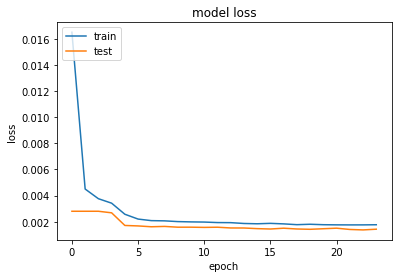

scores_train =  0.009319683313197793
scores_test =  0.008880573611516226


In [148]:
# Création de l'algo 

from sklearn.model_selection import train_test_split

#On sépare le dataset en 4 dataset pour l'entrainer et le tester

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, Y_scaled2, test_size=0.1)


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers

# Initialising the ANN : création des différentes couches

classifier = Sequential()

classifier.add(Dense(units=15, activation='relu', input_dim=23))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=40, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units=10, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1, activation='sigmoid'))


#Sélection de la méthode d'optimisation

classifier.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

callbacks = [EarlyStopping(monitor='loss', patience=2)]


history = classifier.fit(X_train2, y_train2,
                             batch_size=10,
                             epochs=50,
                             callbacks=callbacks,
                             validation_data=(X_test2, y_test2))


import matplotlib.pyplot as plt

print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

scores_train = classifier.evaluate(X_train2, y_train2, verbose=0)
scores_test = classifier.evaluate(X_test2, y_test2, verbose=0)

print("scores_train = ", scores_train[1])
print("scores_test = ", scores_test[1])



In [149]:
from keras.models import model_from_json

# # load json and create model
# json_file = open('delaypermit.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# classifier = model_from_json(loaded_model_json)
# # load weights into new model
# classifier.load_weights("delaypermit.h5")
# print("Loaded model from disk")


prediction = classifier.predict(X_test2)
df_predicted = pd.DataFrame(min_max_scalerY2.inverse_transform(prediction))
df_test = pd.DataFrame(y_test2)
df_test = pd.DataFrame(min_max_scalerY2.inverse_transform(df_test))
result = pd.concat([df_test,df_predicted],axis=1)
result.columns = ['y_test','predicted']
print(np.abs(np.mean(result['y_test']-result['predicted'])))


classifier.save_weights("predict_delay.h5")
result

9.409128719742586


y_test   predicted
0        0.0    0.001039
1        2.0    0.027088
2        0.0    0.000904
3        0.0    0.017920
4        0.0    0.001108
5        3.0    0.712618
6        0.0    0.017216
7        0.0    0.001037
8       10.0    0.198431
9        1.0    0.011042
10       0.0    0.003496
11       0.0    0.003529
12       0.0    0.002293
13       0.0    0.000263
14       0.0    0.005054
15       2.0    0.000352
16     476.0  224.621918
17      13.0    0.008582
18       0.0    0.000020
19       0.0    0.000207
20       0.0    0.003749
21       0.0    0.001477
22       0.0    0.000206
23       0.0    0.000208
24       0.0    0.000470
25       6.0    0.015801
26       6.0    0.027360
27       0.0    0.000320
28       4.0    0.000705
29     143.0  216.589554
...      ...         ...
1458     0.0    0.003996
1459    14.0    0.002524
1460     8.0    0.001257
1461    58.0    0.000790
1462    50.0    0.003630
1463     0.0    0.009003
1464     0.0    0.019765
1465    15.0    0.033686
1466    35.0    0.001735
1467     1.0    0.000085
1468     4.0    0.001042
1469    25.0    0.000510
1470     0.0    0.006959
1471   194.0    4.367241
1472    80.0    0.002019
1473     0.0    0.045936
1474     0.0    0.000712
1475    14.0    0.004130
1476     0.0    0.003280
1477     1.0    0.000551
1478     0.0    0.000851
1479     1.0    0.000633
1480     0.0    0.001556
1481     0.0    0.002320
1482    26.0    0.008272
1483     0.0    0.000187
1484   379.0  230.566498
1485     0.0    0.000600
1486     0.0    0.001121
1487     0.0   37.755890

[1488 rows x 2 columns]